# PCA on iris

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(5)

from sklearn.preprocessing import StandardScaler

def fetch_data():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    return X, y

def fit_pca(X, n=2):
    #standard_scaler = StandardScaler()
    #X = standard_scaler.fit_transform(X)
    #X_test = standard_scaler.transform(X_test)
    pca = decomposition.PCA(n_components=n)
    pca.fit(X)
    X = pca.transform(X)
    return X, pca

def plotPCA3d(X, y):
    fig = plt.figure(1, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean() + 1.5,
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    #plt.show()
    return plt

X, y = fetch_data()

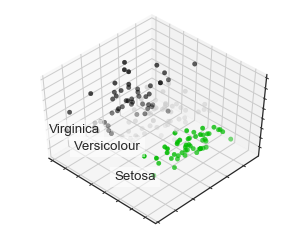

In [32]:
X, _ = fit_pca(X, 3)
plotPCA3d(X, y).show()

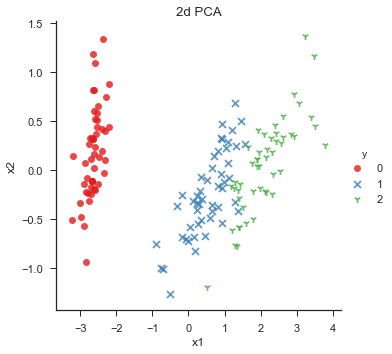

In [34]:
def plotPCA2d(X, y):
    X = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1, ignore_index=True)
    X.columns = ['x1', 'x2', 'y']
    plt.clf()
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")
    sns.lmplot('x1', 'x2', data=X, fit_reg=False, hue="y", markers=["o", "x", "1"], palette="Set1")
    plt.title('2d PCA')
    plt.xlabel('x1')
    plt.ylabel('x2')
    return plt

X, _ = fit_pca(X)
plotPCA2d(X, y).show()

In [19]:
X, y = fetch_data()
_, pca = fit_pca(X, 3)

In [20]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]])

In [21]:
pca.explained_variance_

array([ 2.91081808,  0.92122093,  0.14735328])

In [24]:
X, y = fetch_data()
pd.DataFrame(X).std()

0    0.828066
1    0.433594
2    1.764420
3    0.763161
dtype: float64

In [25]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832])

In [27]:
pca.get_covariance()

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [35]:
pca.mean_

array([ -1.69031455e-15,  -1.63702385e-15,  -1.48251781e-15,
        -1.62314606e-15])

# Truncated SVD

Read about the parameters to `TruncatedSVD` at [the official documentation page](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix

X = sparse_random_matrix(100, 100, density=0.01, random_state=42)

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X) 

print(svd.explained_variance_ratio_) 
print(svd.explained_variance_ratio_.sum())

# PCA and Visualization

We'll demonstrate with the `Iris` dataset, which is a four-dimensional dataset.

Following the sequence of steps outlined earlier, we have:

In [ ]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)              # 4. Transform the data to two dimensions

## Visualization - original dataset

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

In [ ]:
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

## Visualization - after PCA

To getter a better understanding of interaction of the dimensions, we plot the first two PCA dimensions.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))

ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_2D[:, 0], X_2D[:, 1], c=y, cmap=plt.cm.Paired)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])

plt.show()

## Final Result

* We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
* This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

---